## SMS Spam Detection Analysis

- SMS Spam Detection Analysis is a classification project that comes under Natural Language Processing. 
The objective of the project is to analyze the text messages and classify whether the message is ham (legitimate) or spam.

- In this project we are going to analyze and classify the next messages from the dataset using a classifying model with pipelines.

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

- pandas :- used to perform data manipulation and analysis

- numpy:- used to perform a wide variety of mathematical operatio.ns on arrays

- nltk:- a natural language processing toolkit module associated in anaconda
     
- re:- used as a regular expression to find particular patterns and process it
     
- stopwords:- used to remove stop words from the text data

## Loading the dataset

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


- Relevant columns are label and text
- Other columns are unnecessary for processing

In [3]:
# get necessary columns for processing
df = df[['label','text']]

In [4]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


## Preprocessing the dataset

In [5]:
# Check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

- Checks and shows the no. of null values in the two columns.
- In case of null values you must filter it for easier processing.

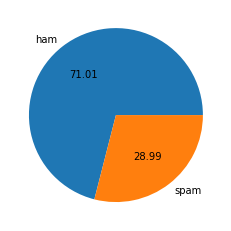

In [6]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [7]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

- Defined to call and clean the text to avoid repeating line by line if further cleaning is needed
- Set(stopwords.words('...')) : used to load the unique list of common stopwords from the specified language as tokens
- Stop words are not meaningful words, deleting those words will not affect the result
- Text are converted into lower case to avoid mismatching
- Special characters and extra spaces are removed
- Stopwords removed from text by splitting the original text and comparing with the STOPWORDS list

In [8]:
# clean the messages
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,label,text,clean_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291 follow not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom january 9 2001 see attached fi...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonderful...
3,spam,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,subject indian springs deal book teco pvr reve...


- New column created to visualize the resuts from the text cleaning

## Input split

In [9]:
# Let us split the data for training
X = df['clean_text']
y = df['label']

- X : input attribute
- y : output attribute

## Model Training

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

- Pipeline :- used for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.
- train_test_split() :- used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
- cross_val_score() :- used to split the data into (X) equal files, trains the data in (y) combinations and returns the (cv) calculated accuracy of the given model.
- CountVectorizer :- used to transform a given text into a vector on the basis of the frequency (count) of each word that occures in the entire text.
- TfidVectorizer :- used to perform bothe word frequency of the next.
- TfidfTransformer :- used to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [11]:
def classify(model, X, y):
    # trian test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # Model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test,y_test)*100)
    
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test,y_pred))

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 98.83990719257541
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       918
        spam       0.97      0.99      0.98       375

    accuracy                           0.99      1293
   macro avg       0.98      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293



- Results using the Logistic Regression Model

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 91.80201082753287
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       918
        spam       1.00      0.72      0.84       375

    accuracy                           0.92      1293
   macro avg       0.95      0.86      0.89      1293
weighted avg       0.93      0.92      0.91      1293



- The accuracy got decreased a little comparing logistic regression model

In [14]:
from sklearn.svm import SVC
model = SVC()
classify(model, X, y)

Accuracy: 98.68522815158546
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       918
        spam       0.96      0.99      0.98       375

    accuracy                           0.99      1293
   macro avg       0.98      0.99      0.98      1293
weighted avg       0.99      0.99      0.99      1293



- SVC model giving better results comparing to the above models

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 98.22119102861562
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       918
        spam       0.96      0.98      0.97       375

    accuracy                           0.98      1293
   macro avg       0.97      0.98      0.98      1293
weighted avg       0.98      0.98      0.98      1293



- Accuracy decreased a little comparing to SVC model

- LogisticRegression model giving better results comparing to the all models